<a href="https://colab.research.google.com/github/gthom73/MLIntegration_project4_group2/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [11]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
import os

# Upload and configure the Kaggle API key
uploaded = files.upload()  # Prompt to upload the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API and download the dataset
!pip install kaggle
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

# Unzip the dataset with overwrite all option
!unzip -o usa-real-estate-dataset.zip

# If needed, rename the file automatically
correct_file_name = 'realtor-data.csv'
extracted_file_name = 'realtor-data.zip.csv'

# Check if the extracted file is in the directory with a different name
if extracted_file_name in os.listdir('.'):
    os.rename(extracted_file_name, correct_file_name)

# Load the dataset and print the first 5 rows
if correct_file_name in os.listdir('.'):
    df = pd.read_csv(correct_file_name)
    print(df.head(5))  # Print the first 5 rows of the dataframe
else:
    print(f"File {correct_file_name} not found in the directory.")





Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
 94% 36.0M/38.2M [00:02<00:00, 22.1MB/s]
100% 38.2M/38.2M [00:02<00:00, 16.9MB/s]
Archive:  usa-real-estate-dataset.zip
  inflating: realtor-data.zip.csv    
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Pu

In [12]:
# List of cities to filter by
cities = ['Kansas City', 'Topeka', 'Denver', 'Dallas']

# Dictionary to map cities to their respective states (Kansas City can be in Missouri or Kansas)
city_states = {
    'Kansas City': ['Missouri', 'Kansas'],  # Kansas City can be in Missouri or Kansas
    'Topeka': ['Kansas'],
    'Denver': ['Colorado'],
    'Dallas': ['Texas']
}

# Loop through each city and display the first 5 rows for that city in the correct state(s)
for city, states in city_states.items():
    # Filter the DataFrame for the city and check if it's in one of the correct states
    filtered_df = df[(df['city'] == city) & (df['state'].isin(states))]

    # Check if the filtered dataframe is empty
    if not filtered_df.empty:
        print(f"First 5 rows for {city}, States: {', '.join(states)}:")
        print(filtered_df.head(5))
    else:
        print(f"No data available for {city} in {', '.join(states)}")


First 5 rows for Kansas City, States: Missouri, Kansas:
        brokered_by    status     price  bed  bath  acre_lot     street  \
914988        322.0  for_sale  372000.0  4.0   3.0      0.19  1614471.0   
914989      58270.0  for_sale   25000.0  3.0   2.0      0.35   144563.0   
914990      84610.0  for_sale   69950.0  2.0   1.0      0.19  1648065.0   
914994      33478.0  for_sale  109000.0  2.0   3.0      0.07  1747899.0   
915001      20177.0  for_sale  137500.0  4.0   1.0      0.23  1740406.0   

               city     state  zip_code  house_size prev_sold_date  
914988  Kansas City  Missouri   64158.0      2300.0     2016-09-09  
914989  Kansas City  Missouri   64133.0      1884.0     2004-03-22  
914990  Kansas City  Missouri   64129.0      1134.0            NaN  
914994  Kansas City  Missouri   64134.0      2062.0     2005-01-13  
915001  Kansas City  Missouri   64134.0       912.0     2008-02-06  
First 5 rows for Topeka, States: Kansas:
        brokered_by    status     pric

In [13]:
# List of cities to analyze
cities = ['Kansas City', 'Topeka', 'Denver', 'Dallas']

# Filter the DataFrame for these cities
filtered_df = df[df['city'].isin(cities)]

# Group by city and number of bedrooms, then calculate count and mean price
result = filtered_df.groupby(['city', 'bed']).agg(
    Houses_Available=('price', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Format the Average Price to be more readable
result['Average_Price'] = result['Average_Price'].round(2)

print(result)


           city    bed  Houses_Available  Average_Price
0        Dallas    1.0               413      228606.82
1        Dallas    2.0              1588      399111.65
2        Dallas    3.0              3399      474756.44
3        Dallas    4.0              1938      698018.75
4        Dallas    5.0               483     1382225.59
5        Dallas    6.0                86     2103946.91
6        Dallas    7.0                10     5322690.00
7        Dallas    8.0                16     2841325.00
8        Dallas    9.0                 2     8525000.00
9        Dallas   10.0                 1     1597500.00
10       Dallas   14.0                 2     1029500.00
11       Dallas   23.0                 1      680000.00
12       Dallas   28.0                 1     3975000.00
13       Dallas   62.0                 1     6500000.00
14       Dallas  222.0                 1      699000.00
15       Denver    1.0               277      442537.16
16       Denver    2.0               717      56

In [14]:
# List of cities to analyze and their acceptable states
city_states = {
    'Kansas City': ['Missouri', 'Kansas'],  # Kansas City can be in Missouri or Kansas
    'Topeka': ['Kansas'],
    'Denver': ['Colorado'],
    'Dallas': ['Texas']
}

# Convert city_states dictionary to a DataFrame for easier filtering
cities_df = pd.DataFrame([(city, state) for city, states in city_states.items() for state in states], columns=['city', 'state'])

# Merge the cities DataFrame with the main DataFrame to filter correctly by city and state
filtered_df = pd.merge(df, cities_df, on=['city', 'state'])

# Further filter the DataFrame to ensure the number of bedrooms is 5 or less
filtered_df = filtered_df[filtered_df['bed'] <= 5]

# Group by city, state, and number of bedrooms ('bed'), then calculate count and mean price
result = filtered_df.groupby(['city', 'state', 'bed']).agg(
    Houses_Available=('price', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Format the Average Price to be more readable
result['Average_Price'] = result['Average_Price'].round(2)

# Display the results
print(result)



           city     state  bed  Houses_Available  Average_Price
0        Dallas     Texas  1.0               411      229210.99
1        Dallas     Texas  2.0              1518      404114.66
2        Dallas     Texas  3.0              2964      490675.12
3        Dallas     Texas  4.0              1625      756389.96
4        Dallas     Texas  5.0               368     1664239.68
5        Denver  Colorado  1.0               276      441501.78
6        Denver  Colorado  2.0               675      573979.85
7        Denver  Colorado  3.0               663      705512.41
8        Denver  Colorado  4.0               454      979627.41
9        Denver  Colorado  5.0               172     1611204.88
10  Kansas City    Kansas  1.0                 2      152500.00
11  Kansas City    Kansas  2.0                79      171958.86
12  Kansas City    Kansas  3.0               149      211580.23
13  Kansas City    Kansas  4.0                66      478251.41
14  Kansas City    Kansas  5.0          

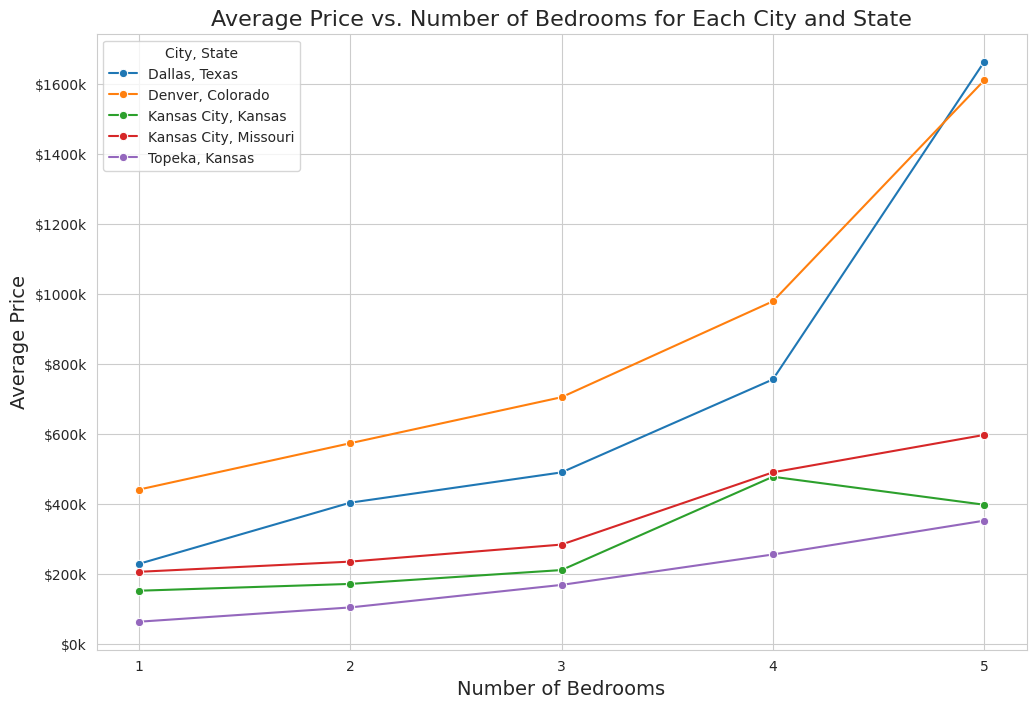

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a new column 'City_State' combining city and state for clearer labeling in the graph
result['City_State'] = result['city'] + ', ' + result['state']

# Create a line plot
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(data=result, x='bed', y='Average_Price', hue='City_State', marker='o')

# Adding titles and labels
plt.title('Average Price vs. Number of Bedrooms for Each City and State', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(result['bed'].unique())  # Ensure all bedroom categories are shown

# Format the y-axis to show dollar sign and the value
lineplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# Enhance the legend for better clarity
plt.legend(title='City, State')
plt.show()





In [16]:
import pandas as pd

# List of cities to analyze and their acceptable states
city_states = {
    'Kansas City': ['Missouri', 'Kansas'],  # Kansas City can be in Missouri or Kansas
    'Topeka': ['Kansas'],
    'Denver': ['Colorado'],
    'Dallas': ['Texas']
}

# Convert city_states dictionary to a DataFrame for easier filtering
cities_df = pd.DataFrame([(city, state) for city, states in city_states.items() for state in states], columns=['city', 'state'])

# Merge the cities DataFrame with the main DataFrame to filter correctly by city and state
filtered_df = pd.merge(df, cities_df, on=['city', 'state'])

# Further filter the DataFrame to ensure the number of bedrooms is 2, 3, or 4
filtered_df = filtered_df[filtered_df['bed'].isin([2, 3, 4])]

# Group by city, state, and number of bedrooms ('bed'), then calculate count and mean price
result = filtered_df.groupby(['city', 'state', 'bed']).agg(
    Houses_Available=('price', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Format the Average Price to be more readable
result['Average_Price'] = result['Average_Price'].round(2)

# Print result to verify
print(result)


           city     state  bed  Houses_Available  Average_Price
0        Dallas     Texas  2.0              1518      404114.66
1        Dallas     Texas  3.0              2964      490675.12
2        Dallas     Texas  4.0              1625      756389.96
3        Denver  Colorado  2.0               675      573979.85
4        Denver  Colorado  3.0               663      705512.41
5        Denver  Colorado  4.0               454      979627.41
6   Kansas City    Kansas  2.0                79      171958.86
7   Kansas City    Kansas  3.0               149      211580.23
8   Kansas City    Kansas  4.0                66      478251.41
9   Kansas City  Missouri  2.0               308      235661.19
10  Kansas City  Missouri  3.0               737      284383.76
11  Kansas City  Missouri  4.0               609      490832.66
12       Topeka    Kansas  2.0                92      104748.36
13       Topeka    Kansas  3.0               244      169137.67
14       Topeka    Kansas  4.0          

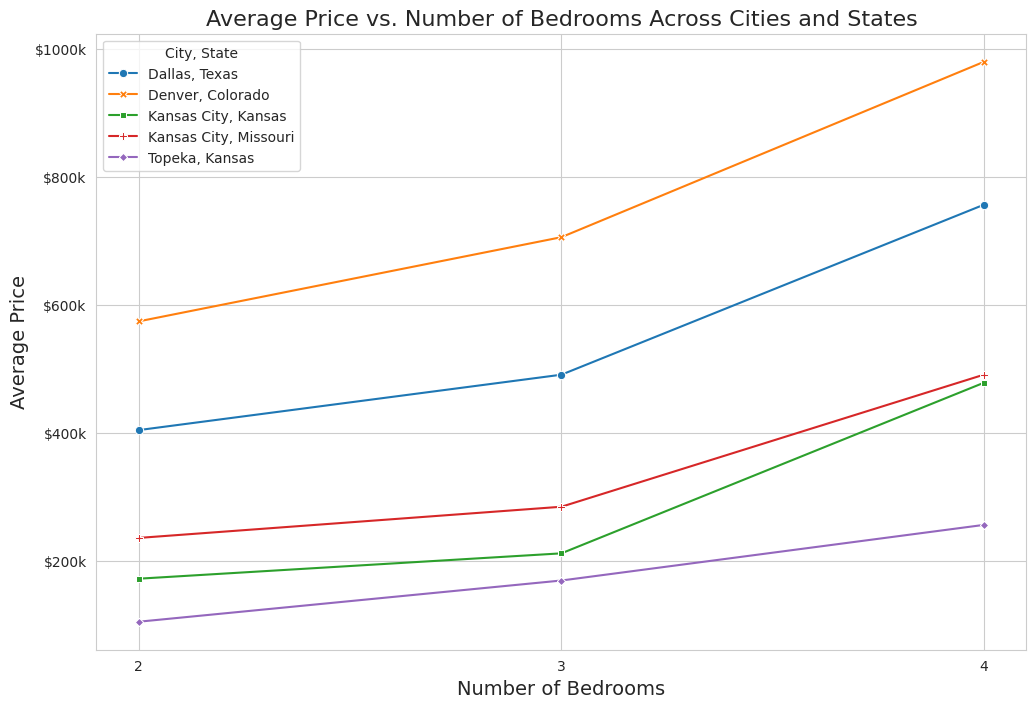

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a new column 'City_State' combining city and state for clearer labeling in the graph
result['City_State'] = result['city'] + ', ' + result['state']

# Create a single line plot
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(data=result, x='bed', y='Average_Price', hue='City_State', style='City_State', markers=True, dashes=False)

# Adding titles and labels
plt.title('Average Price vs. Number of Bedrooms Across Cities and States', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks([2, 3, 4])  # Ensure ticks for 2, 3, and 4 bedrooms are shown

# Format the y-axis to show dollar sign and the value
lineplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# Enhance the legend for better clarity
plt.legend(title='City, State', loc='upper left')

plt.show()



## Compile, Train and Evaluate the Model